#### Prediction using Unsupervised ML

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

#### K-Means Clustering

It is the simplest unsupervised learning algorithm that solves clustering problem.K-means algorithm partition n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster

In [1]:
# importing the necessity libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

#### IRIS DATASET

In [19]:
# reading the data

iris=load_iris()
data = pd.read_csv('Iris.csv')

In [23]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Using K-Means to find the number of clusters (Elbow Method)

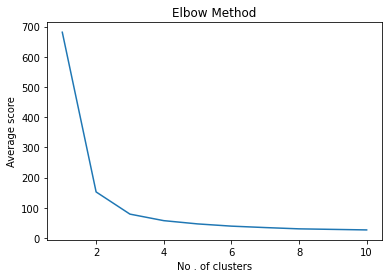

In [26]:
sse=[]
for n in range(1,11):
    kmean=KMeans(n_clusters=n)
    kmean.fit(iris['data'])
    sse.append(kmean.inertia_)
    
# Now plotting the results on the line graph
from matplotlib import pyplot as plt
plt.plot(range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('No . of clusters')
plt.ylabel('Average score')
plt.show()

From the graph elbow point is 3 and hence optimum number of cluster is 3

#### Applying K-Means Clustering method

In [27]:
# k-mean classifier

model=KMeans(n_clusters=3)
model.fit(iris['data'])

KMeans(n_clusters=3)

In [28]:
# Predictions

data.target=model.labels_
d1=data[data.target==0]
d2=data[data.target==1]
d3=data[data.target==2]

In [29]:
#centroids is

model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

#### PLOTTING GRAPH

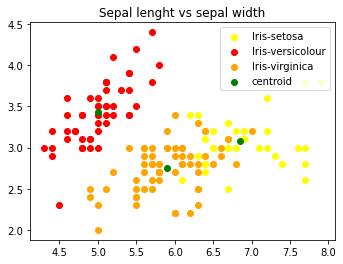

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(d1[['sepal length (cm)']],d1[['sepal width (cm)']], color = 'yellow', label = 'Iris-setosa')
plt.scatter(d2[['sepal length (cm)']], d2[['sepal width (cm)']], color = 'red', label = 'Iris-versicolour')
plt.scatter(d3[['sepal length (cm)']], d3[['sepal width (cm)']], color = 'orange', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, [0]], model.cluster_centers_[:,[1]], color = 'green', label = 'centroid')
plt.title('Sepal lenght vs sepal width')
plt.legend()